# Battle of Neighborhoods in Ha Noi Old Quater

In [2]:
!pip install lxml
!pip install bs4
!pip install Nominatim
!pip install geopy
!pip install geocoder

     |████████████████████████████████| 102kB 15.3MB/s ta 0:00:01
     |████████████████████████████████| 829kB 34.4MB/s eta 0:00:01
     |████████████████████████████████| 81kB 21.4MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future


In [2]:
pip install xlrd

     |████████████████████████████████| 112kB 18.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# 1. Load necessary library

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import lxml
import folium # map rendering library

import pandas as pd
import lxml
import xlrd

print("Libraries imported.")

Libraries imported.


# 2. Get this file excel from https://www.gso.gov.vn/dmhc2015/Default.aspx

# 3. Load file excel districts, wards of VietNam

In [4]:
df = pd.read_excel('oldtown.xls')

In [5]:
df.head()

,Tỉnh Thành Phố,Mã TP,Quận Huyện,Mã QH,Phường Xã,Mã PX,Cấp,Tên Tiếng Anh
0,Thành phố Hà Nội,1,Quận Hoàn Kiếm,2,Phường Phúc Tân,37,Phường,NaN
1,Thành phố Hà Nội,1,Quận Hoàn Kiếm,2,Phường Đồng Xuân,40,Phường,NaN
2,Thành phố Hà Nội,1,Quận Hoàn Kiếm,2,Phường Hàng Mã,43,Phường,NaN
3,Thành phố Hà Nội,1,Quận Hoàn Kiếm,2,Phường Hàng Buồm,46,Phường,NaN
4,Thành phố Hà Nội,1,Quận Hoàn Kiếm,2,Phường Hàng Đào,49,Phường,NaN


In [6]:
df['area'] = df['Phường Xã']+', '+df['Quận Huyện']+', Hà Nội'

dfoldtown=df[['Phường Xã','Quận Huyện','area']]
dfoldtown.columns = ['ward','district','area']


In [7]:
dfoldtown.head(10)

,ward,district,area
0,Phường Phúc Tân,Quận Hoàn Kiếm,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội"
1,Phường Đồng Xuân,Quận Hoàn Kiếm,"Phường Đồng Xuân, Quận Hoàn Kiếm, Hà Nội"
2,Phường Hàng Mã,Quận Hoàn Kiếm,"Phường Hàng Mã, Quận Hoàn Kiếm, Hà Nội"
3,Phường Hàng Buồm,Quận Hoàn Kiếm,"Phường Hàng Buồm, Quận Hoàn Kiếm, Hà Nội"
4,Phường Hàng Đào,Quận Hoàn Kiếm,"Phường Hàng Đào, Quận Hoàn Kiếm, Hà Nội"
5,Phường Hàng Bồ,Quận Hoàn Kiếm,"Phường Hàng Bồ, Quận Hoàn Kiếm, Hà Nội"
6,Phường Cửa Đông,Quận Hoàn Kiếm,"Phường Cửa Đông, Quận Hoàn Kiếm, Hà Nội"
7,Phường Lý Thái Tổ,Quận Hoàn Kiếm,"Phường Lý Thái Tổ, Quận Hoàn Kiếm, Hà Nội"
8,Phường Hàng Bạc,Quận Hoàn Kiếm,"Phường Hàng Bạc, Quận Hoàn Kiếm, Hà Nội"
9,Phường Hàng Gai,Quận Hoàn Kiếm,"Phường Hàng Gai, Quận Hoàn Kiếm, Hà Nội"


In [8]:
dfoldtown.shape

(18, 3)

In [9]:
dfoldtown.to_csv('VN_HN_Oldtown.csv',index=False)

# 4. Add latitude, longitude by call Google Geocode API

In [10]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Malaysia'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [11]:
coords = [ get_latlng(neighborhood) for neighborhood in dfoldtown["area"].tolist() ]

In [12]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_oldtown_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [13]:
df_oldtown_coords.head()

,Latitude,Longitude
0,21.03703,105.85480
1,21.03880,105.84987
2,21.03969,105.84674
3,21.03604,105.85243
4,21.03403,105.85030


In [14]:
# merge the coordinates into the original dataframe
df_oldtown_new =pd.concat([dfoldtown, df_oldtown_coords], axis=1)
df_oldtown_new.head()

,ward,district,area,Latitude,Longitude
0,Phường Phúc Tân,Quận Hoàn Kiếm,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội",21.03703,105.85480
1,Phường Đồng Xuân,Quận Hoàn Kiếm,"Phường Đồng Xuân, Quận Hoàn Kiếm, Hà Nội",21.03880,105.84987
2,Phường Hàng Mã,Quận Hoàn Kiếm,"Phường Hàng Mã, Quận Hoàn Kiếm, Hà Nội",21.03969,105.84674
3,Phường Hàng Buồm,Quận Hoàn Kiếm,"Phường Hàng Buồm, Quận Hoàn Kiếm, Hà Nội",21.03604,105.85243
4,Phường Hàng Đào,Quận Hoàn Kiếm,"Phường Hàng Đào, Quận Hoàn Kiếm, Hà Nội",21.03403,105.85030


**save dataframe to csv**

In [15]:
# save the DataFrame as CSV file
df_oldtown_new.to_csv("VN_HN_OLDTOWN_LATLONG", index=False)

# 5. Create a map of Oldtown's Hà Nội with neighborhoods superimposed on top

In [16]:
address='Hà Nội, Việt Nam'
geolocator = Nominatim(user_agent="HaNoi")

location = geolocator.geocode(address)
lat_HN=location.latitude
long_HN =location.longitude
print('The geograpical coodinate of HaNoi are {},{}.'.format(lat_HN,long_HN))

The geograpical coodinate of HaNoi are 21.0294498,105.8544441.


In [17]:
map_HN = folium.Map(location=[lat_HN, long_HN], zoom_start=14)

# add markers to map
for lat, lng, Neighbourhood in zip(df_oldtown_new['Latitude'], df_oldtown_new['Longitude'], df_oldtown_new['ward']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HN)  
    
map_HN

In [18]:
# save the map as HTML file
map_HN.save('map_HN.html')

# 6. Use the Foursquare API to explore the neighborhoods

In [20]:
# define Foursquare Credentials and Version
CLIENT_ID='GZJDGZSWYX1203V5KNFSAYZIIX2LZVGLUKKM1DG2EERA021B'
CLIENT_SECRET='5HZASHWG5MY0TIOJIQZ2X45SF0Y0QZR2MIQ4EHX3AKTHYKG4'
VERSION=20190919

In [21]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
Hanoi_venues=getNearbyVenues(names=df_oldtown_new['area'],
                               latitudes=df_oldtown_new['Latitude'],
                               longitudes=df_oldtown_new['Longitude'],
                              )

Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội
Phường Đồng Xuân, Quận Hoàn Kiếm, Hà Nội
Phường Hàng Mã, Quận Hoàn Kiếm, Hà Nội
Phường Hàng Buồm, Quận Hoàn Kiếm, Hà Nội
Phường Hàng Đào, Quận Hoàn Kiếm, Hà Nội
Phường Hàng Bồ, Quận Hoàn Kiếm, Hà Nội
Phường Cửa Đông, Quận Hoàn Kiếm, Hà Nội
Phường Lý Thái Tổ, Quận Hoàn Kiếm, Hà Nội
Phường Hàng Bạc, Quận Hoàn Kiếm, Hà Nội
Phường Hàng Gai, Quận Hoàn Kiếm, Hà Nội
Phường Chương Dương, Quận Hoàn Kiếm, Hà Nội
Phường Hàng Trống, Quận Hoàn Kiếm, Hà Nội
Phường Cửa Nam, Quận Hoàn Kiếm, Hà Nội
Phường Hàng Bông, Quận Hoàn Kiếm, Hà Nội
Phường Tràng Tiền, Quận Hoàn Kiếm, Hà Nội
Phường Trần Hưng Đạo, Quận Hoàn Kiếm, Hà Nội
Phường Phan Chu Trinh, Quận Hoàn Kiếm, Hà Nội
Phường Hàng Bài, Quận Hoàn Kiếm, Hà Nội


In [24]:
Hanoi_venues.shape

(1105, 7)

In [25]:
Hanoi_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội",21.03703,105.8548,Cộng Càphê,21.035166,105.853395,Coffee Shop
1,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội",21.03703,105.8548,The Veg,21.035526,105.853580,Vegetarian / Vegan Restaurant
2,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội",21.03703,105.8548,Bun Cha Ta,21.034373,105.854382,Noodle House
3,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội",21.03703,105.8548,La Siesta Hotel,21.034275,105.853351,Hotel
4,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội",21.03703,105.8548,Minh Chay Vegan Restaurant 30 Mã Mây,21.035576,105.853274,Vegetarian / Vegan Restaurant


In [26]:
Hanoi_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Phường Chương Dương, Quận Hoàn Kiếm, Hà Nội",12,12,12,12,12,12
"Phường Cửa Nam, Quận Hoàn Kiếm, Hà Nội",61,61,61,61,61,61
"Phường Cửa Đông, Quận Hoàn Kiếm, Hà Nội",69,69,69,69,69,69
"Phường Hàng Buồm, Quận Hoàn Kiếm, Hà Nội",93,93,93,93,93,93
"Phường Hàng Bài, Quận Hoàn Kiếm, Hà Nội",81,81,81,81,81,81
"Phường Hàng Bông, Quận Hoàn Kiếm, Hà Nội",55,55,55,55,55,55
"Phường Hàng Bạc, Quận Hoàn Kiếm, Hà Nội",100,100,100,100,100,100
"Phường Hàng Bồ, Quận Hoàn Kiếm, Hà Nội",52,52,52,52,52,52
"Phường Hàng Gai, Quận Hoàn Kiếm, Hà Nội",100,100,100,100,100,100


In [27]:
print('There are {} uniques categories.'.format(len(Hanoi_venues['Venue Category'].unique())))

There are 81 uniques categories.


In [28]:
# print out the list of categories
Hanoi_venues['Venue Category'].unique()[:50]

array(['Coffee Shop', 'Vegetarian / Vegan Restaurant', 'Noodle House',
       'Hotel', 'Hostel', 'Vietnamese Restaurant', 'Sandwich Place',
       'Gastropub', 'Beer Garden', 'Burger Joint', 'Café', 'Tea Room',
       'Taco Place', 'Dessert Shop', 'Lounge', 'Pub', 'Spa',
       'Ice Cream Shop', 'French Restaurant', 'Historic Site', 'Food',
       'Cocktail Bar', 'Market', 'Bed & Breakfast', 'Bakery',
       'Tibetan Restaurant', 'Candy Store', 'Nightclub', 'Train Station',
       'Massage Studio', 'Temple', 'Juice Bar', 'Bistro', 'BBQ Joint',
       'Jewelry Store', 'Mobile Phone Shop', 'Park', 'Event Space',
       'Supermarket', 'Smoothie Shop', 'Italian Restaurant', 'Brewery',
       'Food Truck', 'Bar', 'Dim Sum Restaurant', 'Gym / Fitness Center',
       'Hotpot Restaurant', 'Chocolate Shop', 'Malay Restaurant',
       'Brazilian Restaurant'], dtype=object)

**Check how many venues were returned for each neighborhood**

In [29]:
HN_venues1 = Hanoi_venues.groupby('Venue Category').count()

In [30]:
HN_venues1 = HN_venues1.reindex(columns=['Neighbourhood'])
HN_venues1 = HN_venues1.sort_values(by=['Neighbourhood'], ascending=False).head(20)
HN_venues1.to_csv('HN_venues1.csv')

**Draw char**

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
HN_venues_bar = pd.read_csv('HN_venues1.csv')

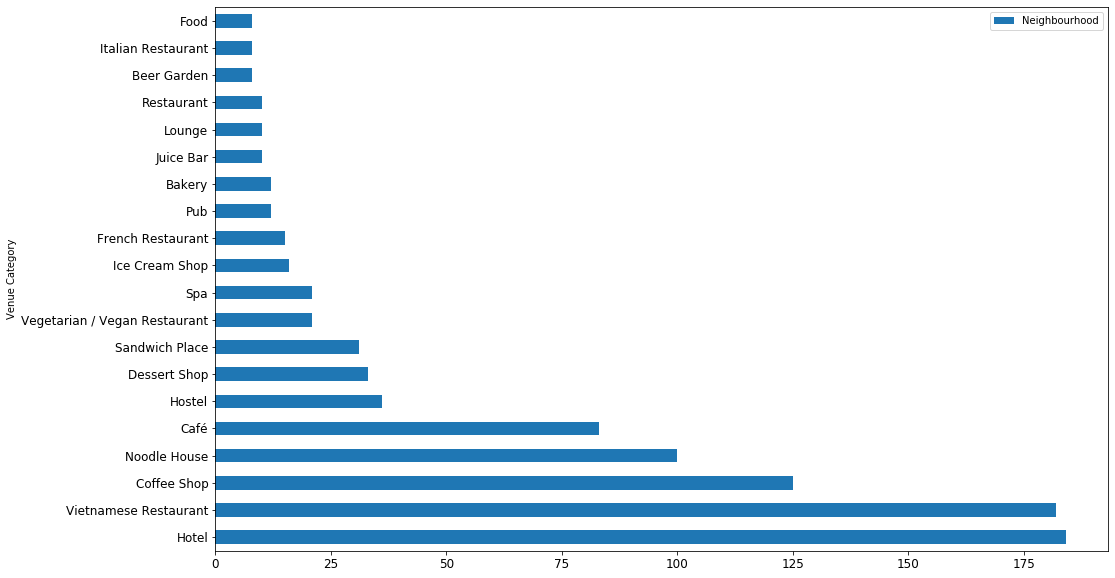

In [32]:
HN_venues_bar.plot.barh(x='Venue Category',fontsize = 12, figsize=(16, 10),stacked=True);


# 7. Analysing Each Neighborhood

In [33]:
# one hot encoding
hn_onehot = pd.get_dummies(Hanoi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hn_onehot['Neighbourhood'] = Hanoi_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [hn_onehot.columns[-1]] + list(hn_onehot.columns[:-1])
hn_onehot.head()

,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Ballroom,Bar,Bed & Breakfast,Beer Garden,Belgian Restaurant,Bistro,Brazilian Restaurant,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Café,Candy Store,Chocolate Shop,Cocktail Bar,Coffee Shop,Creperie,Cultural Center,Dessert Shop,Dim Sum Restaurant,Electronics Store,Event Space,Fast Food Restaurant,Food,Food Truck,French Restaurant,Frozen Yogurt Shop,Gastropub,German Restaurant,Gym,Gym / Fitness Center,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lounge,Malay Restaurant,Market,Massage Studio,Mobile Phone Shop,Modern European Restaurant,Motel,Nightclub,Noodle House,Opera House,Park,Pool,Pub,Restaurant,Salad Place,Sandwich Place,Shawarma Place,Smoothie Shop,Soup Place,Spa,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Temple,Tennis Stadium,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội"
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội"
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội"
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội"
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội"


**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [34]:
HN_grouped=hn_onehot.groupby('Neighbourhood').mean().reset_index()
HN_grouped

,Neighbourhood,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Ballroom,Bar,Bed & Breakfast,Beer Garden,Belgian Restaurant,Bistro,Brazilian Restaurant,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Café,Candy Store,Chocolate Shop,Cocktail Bar,Coffee Shop,Creperie,Cultural Center,Dessert Shop,Dim Sum Restaurant,Electronics Store,Event Space,Fast Food Restaurant,Food,Food Truck,French Restaurant,Frozen Yogurt Shop,Gastropub,German Restaurant,Gym,Gym / Fitness Center,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lounge,Malay Restaurant,Market,Massage Studio,Mobile Phone Shop,Modern European Restaurant,Motel,Nightclub,Noodle House,Opera House,Park,Pool,Pub,Restaurant,Salad Place,Sandwich Place,Shawarma Place,Smoothie Shop,Soup Place,Spa,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Temple,Tennis Stadium,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,"Phường Chương Dương, Quận Hoàn Kiếm, Hà Nội",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000
1,"Phường Cửa Nam, Quận Hoàn Kiếm, Hà Nội",0.032787,0.000000,0.016393,0.049180,0.000000,0.032787,0.000000,0.000000,0.000000,0.016393,0.016393,0.000000,0.000000,0.000000,0.000000,0.098361,0.000000,0.016393,0.016393,0.114754,0.000000,0.000000,0.016393,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.016393,0.016393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131148,0.000000,0.016393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032787,0.000000,0.016393,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.016393,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.032787,0.000000,0.000000,0.016393,0.000000,0.000000,0.016393,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.000000,0.016393,0.180328,0.000000
2,"Phường Cửa Đông, Quận Hoàn Kiếm, Hà Nội",0.000000,0.000000,0.014493,0.000000,0.000000,0.000000,0.014493,0.000000,0.000000,0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.101449,0.000000,0.000000,0.014493,0.115942,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028986,0.231884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014493,0.014493,0.000000,0.000000,0.000000,0.000000,0.014493,0.014493,0.000000,0.000000,0.000000,0.144928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014493,0.000000,0.000000,0.000000,0.028986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014493,0.159420,0.000000
3,"Phường Hàng Buồm, Quận Hoàn Kiếm, Hà Nội",0.000000,0.000000,0.000000,0.010753,0.000000,0.000000,0.010753,0.010753,0.000000,0.000000,0.000000,0.000000,0.000000,0.010753,0.000000,0.053763,0.010753,0.000000,0.000000,0.096774,0.000000,0.000000,0.021505,0.000000,0.000000,0.000000,0.000000,0.010753,0.000000,0.021505,0.000000,0.010753,0.000000,0.000000,0.000000,0.010753,0.000000,0.053763,0.204301,0.000000,0.000000,0.010753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010753,0.000000,0.010753,0.000000,0.000000,0.000000,0.000000,0.010753,0.086022,0.000000,0.000000,0.00000

**let's print each neighborhood along with the top 5 most common venues**

In [35]:
num_top_venues = 5


for hood in HN_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = HN_grouped[HN_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Phường Chương Dương, Quận Hoàn Kiếm, Hà Nội----
                venue  freq
0                Café  0.25
1  Italian Restaurant  0.08
2           Juice Bar  0.08
3        Noodle House  0.08
4           Nightclub  0.08


----Phường Cửa Nam, Quận Hoàn Kiếm, Hà Nội----
                   venue  freq
0  Vietnamese Restaurant  0.18
1                  Hotel  0.13
2            Coffee Shop  0.11
3                   Café  0.10
4                 Bakery  0.05


----Phường Cửa Đông, Quận Hoàn Kiếm, Hà Nội----
                   venue  freq
0                  Hotel  0.23
1  Vietnamese Restaurant  0.16
2           Noodle House  0.14
3            Coffee Shop  0.12
4                   Café  0.10


----Phường Hàng Buồm, Quận Hoàn Kiếm, Hà Nội----
                   venue  freq
0  Vietnamese Restaurant  0.20
1                  Hotel  0.20
2            Coffee Shop  0.10
3           Noodle House  0.09
4                 Hostel  0.05


----Phường Hàng Bài, Quận Hoàn Kiếm, Hà Nội----
                   ven

**Let's put that into a pandas dataframe**
<br>First, let's write a function to sort the venues in descending order

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood

In [37]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = HN_grouped['Neighbourhood']

for ind in np.arange(HN_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HN_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Phường Chương Dương, Quận Hoàn Kiếm, Hà Nội",Café,Coffee Shop,Italian Restaurant,Smoothie Shop,Nightclub,Supermarket,Juice Bar,Noodle House,Vietnamese Restaurant,Hotel
1,"Phường Cửa Nam, Quận Hoàn Kiếm, Hà Nội",Vietnamese Restaurant,Hotel,Coffee Shop,Café,Bakery,Korean Restaurant,Sandwich Place,Asian Restaurant,Bar,Chocolate Shop
2,"Phường Cửa Đông, Quận Hoàn Kiếm, Hà Nội",Hotel,Vietnamese Restaurant,Noodle House,Coffee Shop,Café,Dessert Shop,Hostel,Spa,Massage Studio,Cocktail Bar
3,"Phường Hàng Buồm, Quận Hoàn Kiếm, Hà Nội",Hotel,Vietnamese Restaurant,Coffee Shop,Noodle House,Hostel,Café,Sandwich Place,Dessert Shop,French Restaurant,Vegetarian / Vegan Restaurant
4,"Phường Hàng Bài, Quận Hoàn Kiếm, Hà Nội",Coffee Shop,Vietnamese Restaurant,Dessert Shop,Café,Noodle House,Hotel,Steakhouse,Ice Cream Shop,Sushi Restaurant,Italian Restaurant


# 8.Cluster Neighborhoods

In [38]:
# set number of clusters
kclusters = 5

hn_grouped_clustering = HN_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 
# to change use .astype()

array([4, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 3, 0], dtype=int32)

**Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.**

In [39]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)
neighbourhoods_venues_sorted.head()


,Cluster_Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,"Phường Chương Dương, Quận Hoàn Kiếm, Hà Nội",Café,Coffee Shop,Italian Restaurant,Smoothie Shop,Nightclub,Supermarket,Juice Bar,Noodle House,Vietnamese Restaurant,Hotel
1,1,"Phường Cửa Nam, Quận Hoàn Kiếm, Hà Nội",Vietnamese Restaurant,Hotel,Coffee Shop,Café,Bakery,Korean Restaurant,Sandwich Place,Asian Restaurant,Bar,Chocolate Shop
2,1,"Phường Cửa Đông, Quận Hoàn Kiếm, Hà Nội",Hotel,Vietnamese Restaurant,Noodle House,Coffee Shop,Café,Dessert Shop,Hostel,Spa,Massage Studio,Cocktail Bar
3,1,"Phường Hàng Buồm, Quận Hoàn Kiếm, Hà Nội",Hotel,Vietnamese Restaurant,Coffee Shop,Noodle House,Hostel,Café,Sandwich Place,Dessert Shop,French Restaurant,Vegetarian / Vegan Restaurant
4,2,"Phường Hàng Bài, Quận Hoàn Kiếm, Hà Nội",Coffee Shop,Vietnamese Restaurant,Dessert Shop,Café,Noodle House,Hotel,Steakhouse,Ice Cream Shop,Sushi Restaurant,Italian Restaurant


In [40]:
HN_merged = df_oldtown_new

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
HN_merged = HN_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='area')

HN_merged.head() # check the last columns!

,ward,district,area,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Phường Phúc Tân,Quận Hoàn Kiếm,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội",21.03703,105.85480,1,Vietnamese Restaurant,Hotel,Noodle House,Coffee Shop,Café,Sandwich Place,Vegetarian / Vegan Restaurant,Hostel,Ice Cream Shop,Dessert Shop
1,Phường Đồng Xuân,Quận Hoàn Kiếm,"Phường Đồng Xuân, Quận Hoàn Kiếm, Hà Nội",21.03880,105.84987,0,Hostel,Vietnamese Restaurant,Noodle House,Dessert Shop,Hotel,Coffee Shop,Sandwich Place,Food,Tea Room,Pub
2,Phường Hàng Mã,Quận Hoàn Kiếm,"Phường Hàng Mã, Quận Hoàn Kiếm, Hà Nội",21.03969,105.84674,1,Vietnamese Restaurant,Coffee Shop,Dessert Shop,Hotel,Noodle House,Spa,Food,Market,Sandwich Place,Cocktail Bar
3,Phường Hàng Buồm,Quận Hoàn Kiếm,"Phường Hàng Buồm, Quận Hoàn Kiếm, Hà Nội",21.03604,105.85243,1,Hotel,Vietnamese Restaurant,Coffee Shop,Noodle House,Hostel,Café,Sandwich Place,Dessert Shop,French Restaurant,Vegetarian / Vegan Restaurant
4,Phường Hàng Đào,Quận Hoàn Kiếm,"Phường Hàng Đào, Quận Hoàn Kiếm, Hà Nội",21.03403,105.85030,1,Vietnamese Restaurant,Hotel,Noodle House,Coffee Shop,Hostel,Sandwich Place,Café,Vegetarian / Vegan Restaurant,Dessert Shop,Spa


**We find that there is no data available for some neighbourhood droping that row**

In [41]:
HN_merged=HN_merged.dropna()

In [42]:
HN_merged['Cluster_Labels'] = HN_merged.Cluster_Labels.astype(int)
HN_merged.head(10)

,ward,district,area,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Phường Phúc Tân,Quận Hoàn Kiếm,"Phường Phúc Tân, Quận Hoàn Kiếm, Hà Nội",21.03703,105.85480,1,Vietnamese Restaurant,Hotel,Noodle House,Coffee Shop,Café,Sandwich Place,Vegetarian / Vegan Restaurant,Hostel,Ice Cream Shop,Dessert Shop
1,Phường Đồng Xuân,Quận Hoàn Kiếm,"Phường Đồng Xuân, Quận Hoàn Kiếm, Hà Nội",21.03880,105.84987,0,Hostel,Vietnamese Restaurant,Noodle House,Dessert Shop,Hotel,Coffee Shop,Sandwich Place,Food,Tea Room,Pub
2,Phường Hàng Mã,Quận Hoàn Kiếm,"Phường Hàng Mã, Quận Hoàn Kiếm, Hà Nội",21.03969,105.84674,1,Vietnamese Restaurant,Coffee Shop,Dessert Shop,Hotel,Noodle House,Spa,Food,Market,Sandwich Place,Cocktail Bar
3,Phường Hàng Buồm,Quận Hoàn Kiếm,"Phường Hàng Buồm, Quận Hoàn Kiếm, Hà Nội",21.03604,105.85243,1,Hotel,Vietnamese Restaurant,Coffee Shop,Noodle House,Hostel,Café,Sandwich Place,Dessert Shop,French Restaurant,Vegetarian / Vegan Restaurant
4,Phường Hàng Đào,Quận Hoàn Kiếm,"Phường Hàng Đào, Quận Hoàn Kiếm, Hà Nội",21.03403,105.85030,1,Vietnamese Restaurant,Hotel,Noodle House,Coffee Shop,Hostel,Sandwich Place,Café,Vegetarian / Vegan Restaurant,Dessert Shop,Spa
5,Phường Hàng Bồ,Quận Hoàn Kiếm,"Phường Hàng Bồ, Quận Hoàn Kiếm, Hà Nội",21.03516,105.84822,0,Hotel,Noodle House,Vietnamese Restaurant,Hostel,Sandwich Place,Coffee Shop,Dessert Shop,Café,Spa,Pub
6,Phường Cửa Đông,Quận Hoàn Kiếm,"Phường Cửa Đông, Quận Hoàn Kiếm, Hà Nội",21.03243,105.84548,1,Hotel,Vietnamese Restaurant,Noodle House,Coffee Shop,Café,Dessert Shop,Hostel,Spa,Massage Studio,Cocktail Bar
7,Phường Lý Thái Tổ,Quận Hoàn Kiếm,"Phường Lý Thái Tổ, Quận Hoàn Kiếm, Hà Nội",21.03157,105.85458,1,Hotel,Vietnamese Restaurant,Coffee Shop,Café,Noodle House,Spa,Sandwich Place,Vegetarian / Vegan Restaurant,French Restaurant,Temple
8,Phường Hàng Bạc,Quận Hoàn Kiếm,"Phường Hàng Bạc, Quận Hoàn Kiếm, Hà Nội",21.03390,105.85244,1,Hotel,Vietnamese Restaurant,Coffee Shop,Noodle House,Café,Sandwich Place,Hostel,Dessert Shop,Vegetarian / Vegan Restaurant,Pub
9,Phường Hàng Gai,Quận Hoàn Kiếm,"Phường Hàng Gai, Quận Hoàn Kiếm, Hà Nội",21.03205,105.84869,1,Hotel,Vietnamese Restaurant,Noodle House,Coffee Shop,Café,Hostel,Spa,Dessert Shop,Ice Cream Shop,Pub


In [43]:
# create map
map_clusters = folium.Map(location=[lat_HN, long_HN], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HN_merged['Latitude'], HN_merged['Longitude'], HN_merged['area'], HN_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 9. Examine Clusters

**Cluster 1**

In [242]:
HN_merged.loc[HN_merged['Cluster_Labels'] == 0, HN_merged.columns[[0] + list(range(5, HN_merged.shape[1]))]]

,ward,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Phường Đồng Xuân,0,Noodle House,Vietnamese Restaurant,Hostel,Hotel,Dessert Shop,Sandwich Place,Coffee Shop,Pub,Food,Tea Room
2,Phường Hàng Mã,0,Coffee Shop,Noodle House,Dessert Shop,Vietnamese Restaurant,Food,Cocktail Bar,Salad Place,Sandwich Place,Seafood Restaurant,Hotel
5,Phường Hàng Bồ,0,Hotel,Noodle House,Vietnamese Restaurant,Hostel,Sandwich Place,Coffee Shop,Dessert Shop,Café,Food,Massage Studio


**Cluster 2**

In [243]:
HN_merged.loc[HN_merged['Cluster_Labels'] == 1, HN_merged.columns[[0] + list(range(5, HN_merged.shape[1]))]]

,ward,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Phường Phúc Tân,1,Vietnamese Restaurant,Hotel,Noodle House,Coffee Shop,Café,Vegetarian / Vegan Restaurant,Hostel,Sandwich Place,Ice Cream Shop,Dessert Shop
3,Phường Hàng Buồm,1,Vietnamese Restaurant,Hotel,Noodle House,Coffee Shop,Café,Hostel,Sandwich Place,Dessert Shop,French Restaurant,Vegetarian / Vegan Restaurant
4,Phường Hàng Đào,1,Vietnamese Restaurant,Hotel,Noodle House,Coffee Shop,Hostel,Café,Sandwich Place,Vegetarian / Vegan Restaurant,Dessert Shop,Pub
6,Phường Cửa Đông,1,Hotel,Vietnamese Restaurant,Noodle House,Coffee Shop,Café,Dessert Shop,Spa,Hostel,Juice Bar,Bed & Breakfast
7,Phường Lý Thái Tổ,1,Vietnamese Restaurant,Hotel,Coffee Shop,Café,Noodle House,Spa,Sandwich Place,French Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant
8,Phường Hàng Bạc,1,Hotel,Vietnamese Restaurant,Coffee Shop,Noodle House,Café,Hostel,Sandwich Place,Dessert Shop,Vegetarian / Vegan Restaurant,Pub
9,Phường Hàng Gai,1,Hotel,Vietnamese Restaurant,Noodle House,Coffee Shop,Café,Hostel,Spa,Dessert Shop,Ice Cream Shop,Beer Garden
11,Phường Hàng Trống,1,Hotel,Café,Coffee Shop,Noodle House,Vietnamese Restaurant,Spa,Hostel,Market,Park,Mobile Phone Shop
12,Phường Cửa Nam,1,Vietnamese Restaurant,Hotel,Coffee Shop,Café,Bakery,Sandwich Place,Bar,Asian Restaurant,Korean Restaurant,Restaurant
13,Phường Hàng Bông,1,Vietnamese Restaurant,Hotel,Coffee Shop,Café,Noodle House,Restaurant,Ice Cream Shop,Sandwich Place,Hotpot Restaurant,Japanese Restaurant


**Cluster 3**

In [244]:
HN_merged.loc[HN_merged['Cluster_Labels'] == 2, HN_merged.columns[[0] + list(range(5, HN_merged.shape[1]))]]

,ward,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Phường Tràng Tiền,2,Coffee Shop,Café,Vietnamese Restaurant,Ice Cream Shop,Restaurant,Hotel Bar,Hotel,History Museum,Italian Restaurant,Cultural Center
16,Phường Phan Chu Trinh,2,Vietnamese Restaurant,Restaurant,Café,Coffee Shop,Hotel,Ice Cream Shop,Cultural Center,Noodle House,Hotel Bar,Hotpot Restaurant
17,Phường Hàng Bài,2,Coffee Shop,Vietnamese Restaurant,Dessert Shop,Noodle House,Café,Hotel,Steakhouse,Wine Bar,Cultural Center,French Restaurant


**Cluster 4**

In [245]:
HN_merged.loc[HN_merged['Cluster_Labels'] == 3, HN_merged.columns[[0] + list(range(5, HN_merged.shape[1]))]]

,ward,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Phường Trần Hưng Đạo,3,Hotel,Chocolate Shop,Supermarket,Vietnamese Restaurant,French Restaurant,Lounge,Cultural Center,Noodle House,Coffee Shop,Restaurant


**Cluster 5**

In [246]:
HN_merged.loc[HN_merged['Cluster_Labels'] == 4, HN_merged.columns[[0] + list(range(5, HN_merged.shape[1]))]]

,ward,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Phường Chương Dương,4,Café,Coffee Shop,Italian Restaurant,Seafood Restaurant,Smoothie Shop,Noodle House,Supermarket,Juice Bar,Nightclub,Vietnamese Restaurant
